In [1]:
# Thêm autoreload vào để tự động reload lại module nếu có thay đổi code trong module
%load_ext autoreload
%autoreload 2

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import warnings

# Thêm đường dẫn dẫn đến thư mục cha
sys.path.append(os.path.abspath(".."))
warnings.filterwarnings("ignore")

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
def draw_landmarks(mp_drawing, mp_pose, image : cv2, pose_landmarks : np.array):
    """
    Vẽ landmarks lên ảnh
    """
    mp_drawing.draw_landmarks(
        image,
        pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(
            color=(255, 0, 0),  # Màu sắc của các landmark
            thickness=5,  # Độ dày của các đường nối landmark
            circle_radius=5,  # Bán kính của các điểm landmark
        ),
        connection_drawing_spec=mp_drawing.DrawingSpec(
            color=(0, 255, 0),  # Màu sắc của các đường nối
            thickness=5,  # Độ dày của các đường nối
        ),
    )

    image_shape = image.shape

    # vẽ màu đỏ tại đầu gối chân trái
    cv2.circle(image, (int(pose_landmarks.landmark[23].x * image_shape[1]), int(pose_landmarks.landmark[23].y * image_shape[0])), 5, (0, 0, 255), -1)

    return image

In [3]:
def extract_key_points_from_image(
    image_path: str,
    name: str = "pose",
):
    # Khởi tạo MediaPipe Pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(
        static_image_mode=True, model_complexity=1, smooth_landmarks=True
    )

    image = cv2.imread(image_path)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Phát hiện pose
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        image_landmarks = draw_landmarks(mp_drawing, mp_pose, image, results.pose_landmarks)
        image_landmarks = cv2.cvtColor(image_landmarks, cv2.COLOR_BGR2RGB)
        plt.imshow(image_landmarks)
        plt.axis('off')  # Hide axis
        plt.show()

        # save image
        # cv2.imwrite(f"./data_images/3_landmarks/{name}.jpg", image_landmarks)
    else:
        print(f"Cannot detect pose in image {image_path}")
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

    pose.close()

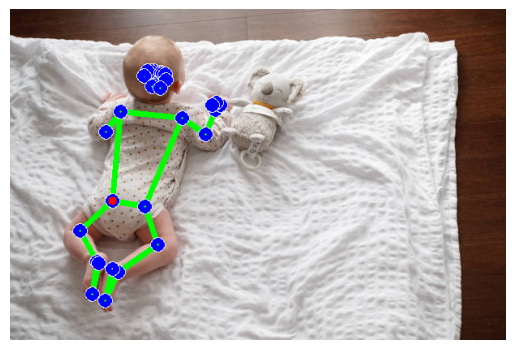

In [4]:
extract_key_points_from_image("../../data_images/new 2/99.jpg")

1.jpg


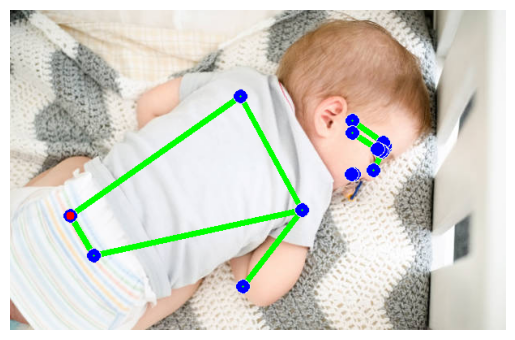

10.jpg


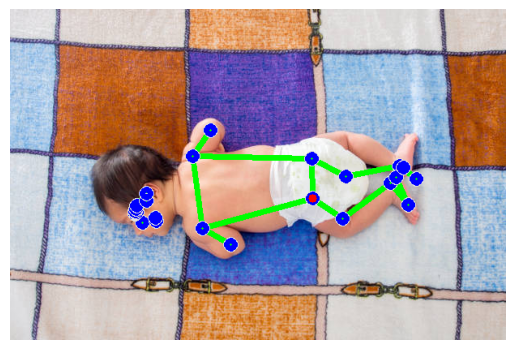

11.jpg


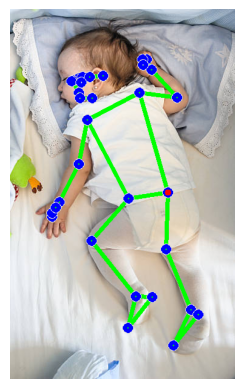

13.jpg


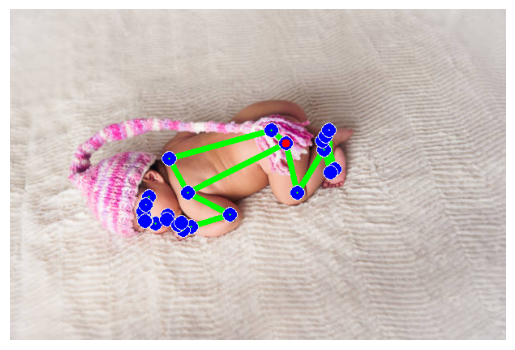

15.jpg


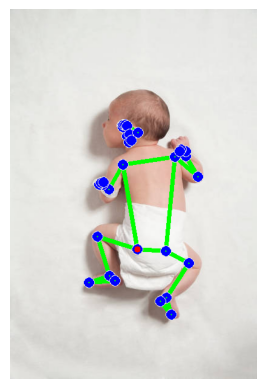

16.jpg


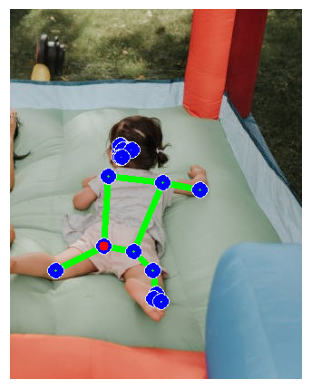

17.jpg


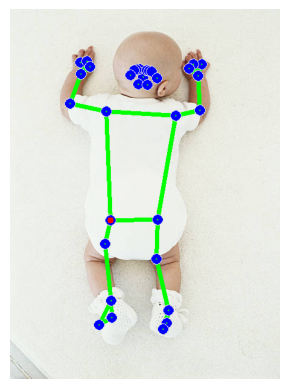

18.jpg


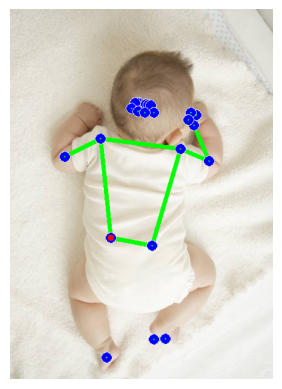

2.jpg


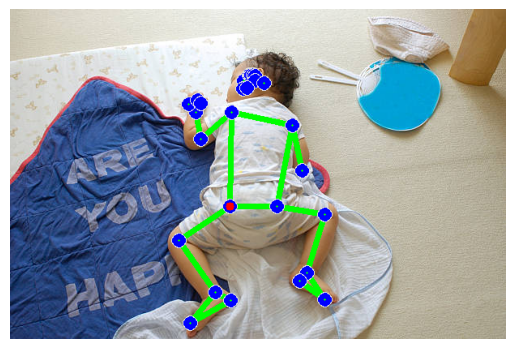

20.jpg


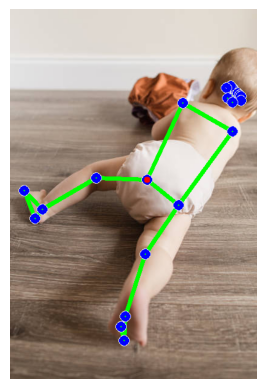

21.jpg


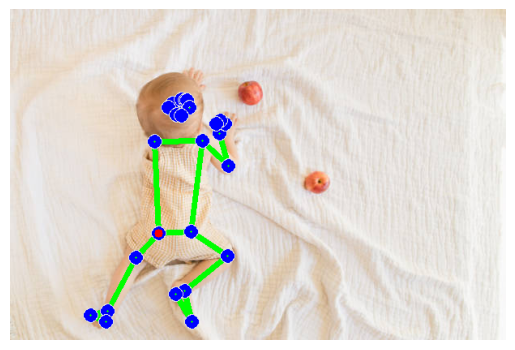

22.jpg


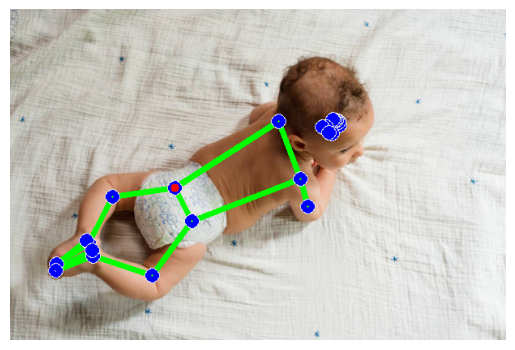

23.jpg


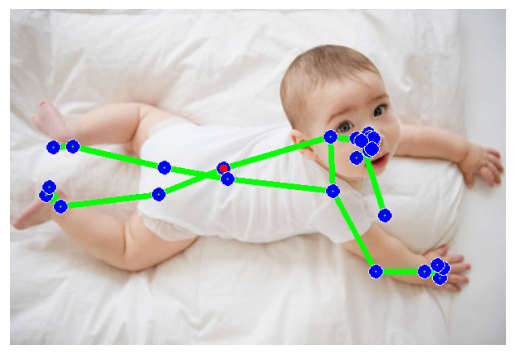

24.jpg


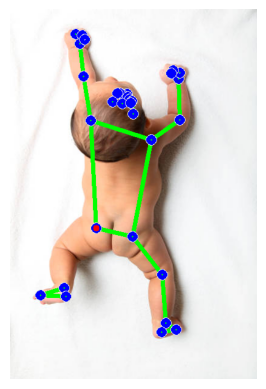

25.jpg


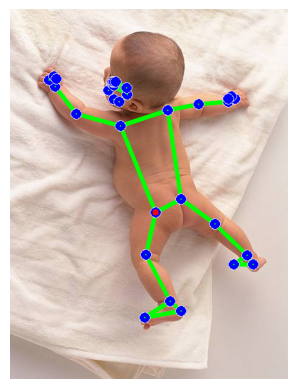

26.jpg


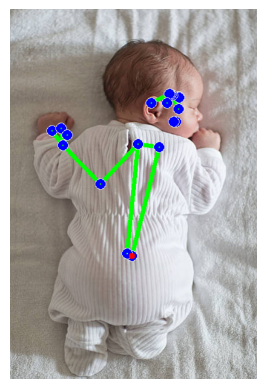

27.jpg


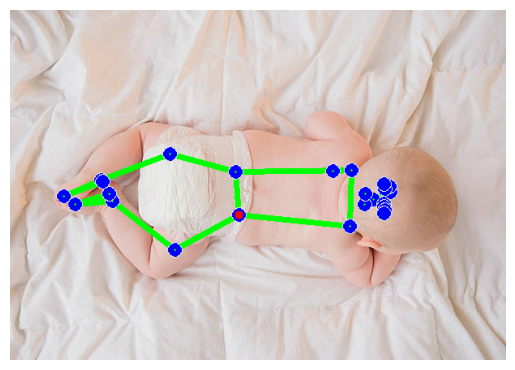

28.jpg


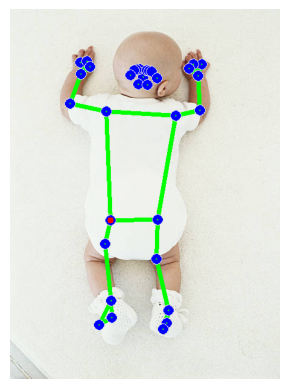

29.jpg


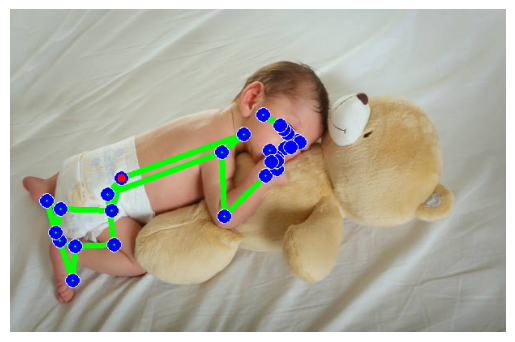

3.jpg


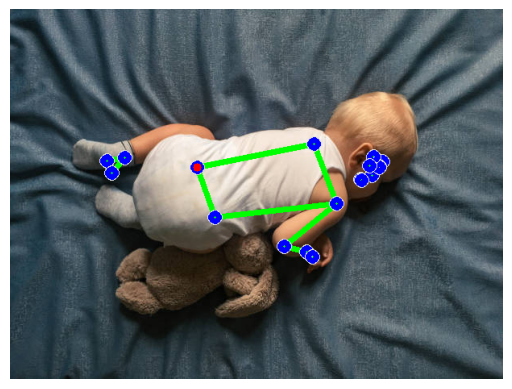

30.jpg


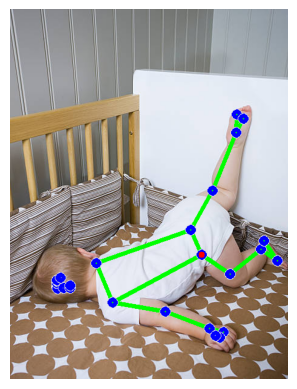

31.jpg


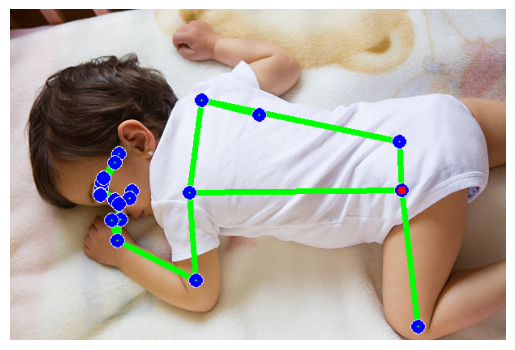

4.jpg


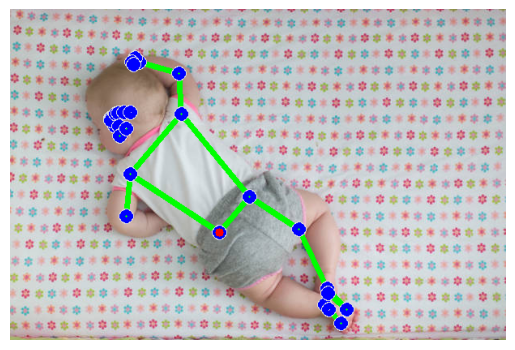

5.jpg


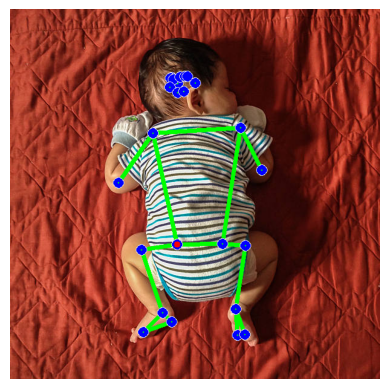

6.jpg


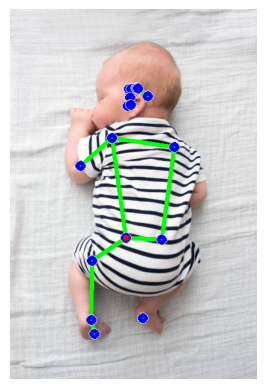

7.jpg


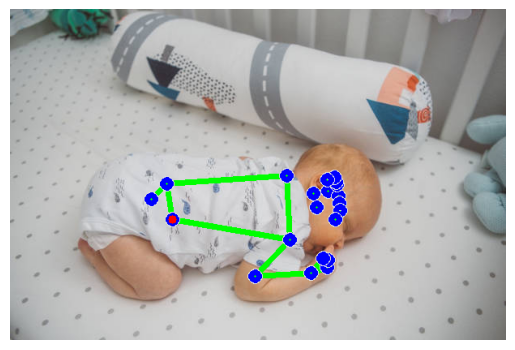

8.jpg


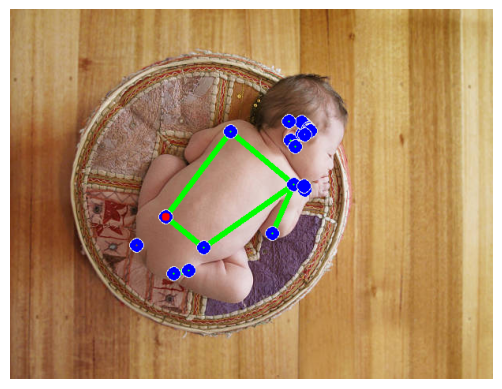

9.jpg


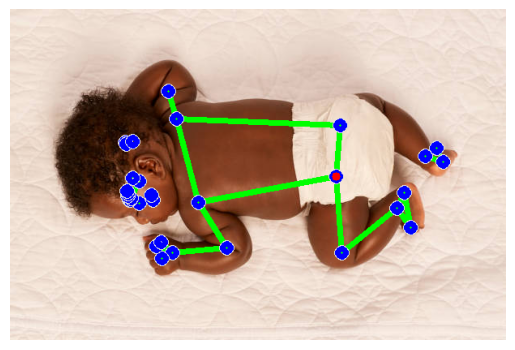

In [5]:
for filename in os.listdir("../../data_images/testing/3_procumbent"):
    if filename.endswith(".jpg"):
        print(filename)
        image_path = os.path.join("../../data_images/testing/3_procumbent", filename)
        extract_key_points_from_image(image_path, name=filename.split(".")[0])